# Cell Adhesion Assay - Data Analysis

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

Load a <code>pandas.DataFrame</code> from a <code>.csv</code> file. Then <code>display</code> a small sample of the <code>pandas.DataFrame</code> with the <code>head()</code> and <code>tile()</code> methods. The default number of elements to display is 5. However, it is posible to pass a custom number.

In [2]:
data=pd.read_csv('../Data/ResultsTable_Project.csv')
display(data.head(3))
display(data.tail(3))

,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
0,1,HQ,A,1,1,0.8231,0.0,0.9257,0.8729,2,0.1253,15.9617
1,2,HQ,A,1,2,0.7649,0.0,0.8019,0.7965,2,0.1143,17.4918
2,3,HQ,A,1,3,0.8225,0.0,0.8885,0.8669,6,0.1244,48.2154


,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
21,22,NC,B,4,1,4.3531,0.0,0.003096,0.02307,1,0.003312,301.9414
22,23,NC,B,4,2,8.0302,0.0,0.000000,0.12650,1,0.018160,55.0573
23,24,NC,B,4,3,5.1462,0.0,0.000000,0.10650,1,0.015290,65.4062


Overview of data

In [3]:
# overview of the numerical data
display(data.describe())

,n,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,2.50000,2.000000,1.894879,0.272879,0.474452,0.495066,3.750000,0.071062,91.898321
std,7.071068,1.14208,0.834058,2.385733,0.545870,0.410401,0.351779,3.650491,0.050491,117.822826
min,1.000000,1.00000,1.000000,0.315500,0.000000,0.000000,0.012510,1.000000,0.001796,7.597800
25%,6.750000,1.75000,1.000000,0.514950,0.000000,0.072759,0.130100,1.000000,0.018685,29.999175
50%,12.500000,2.50000,2.000000,0.748750,0.000000,0.487600,0.553200,2.000000,0.079415,59.566400
75%,18.250000,3.25000,3.000000,1.682200,0.053400,0.890050,0.855200,6.000000,0.122800,100.629550
max,24.000000,4.00000,3.000000,8.030200,1.782200,1.000000,0.916900,12.000000,0.131600,556.750400


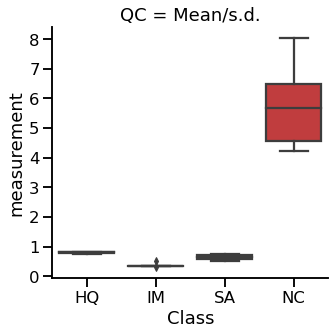

In [13]:
# 'Melt' the data
dataMelted = data.melt(id_vars='Class',
                       value_vars=['Mean/s.d.'],
                       var_name='QC',
                       value_name='measurement')

# Plot the melted data
with sns.plotting_context('talk'):
    sns.catplot(x='Class',
                y='measurement',
                col='QC',
                data=dataMelted,
                kind="box",
                height=5,
                aspect=1);

# Save the plot
plt.savefig('myBoxplot_blurring.png')

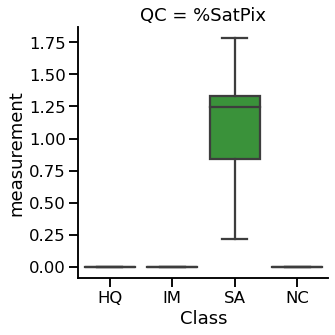

In [5]:
# 'Melt' the data
dataMelted = data.melt(id_vars='Class',
                       value_vars=['%SatPix'],
                       var_name='QC',
                       value_name='measurement')

# Plot the melted data
with sns.plotting_context('talk'):
    sns.catplot(x='Class',
                y='measurement',
                col='QC',
                data=dataMelted,
                kind="box",
                height=5,
                aspect=1);

# Save the plot
plt.savefig('myBoxplot_saturation.png')

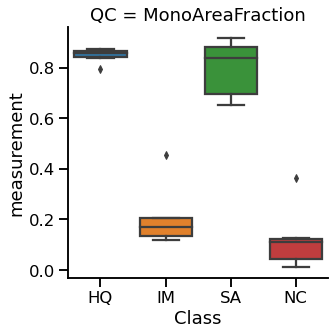

In [6]:
# 'Melt' the data
dataMelted = data.melt(id_vars='Class',
                       value_vars=['MonoAreaFraction'],
                       var_name='QC',
                       value_name='measurement')

# Plot the melted data
with sns.plotting_context('talk'):
    sns.catplot(x='Class',
                y='measurement',
                col='QC',
                data=dataMelted,
                kind="box",
                height=5,
                aspect=1);

# Save the plot
plt.savefig('myBoxplot_monolayer.png')

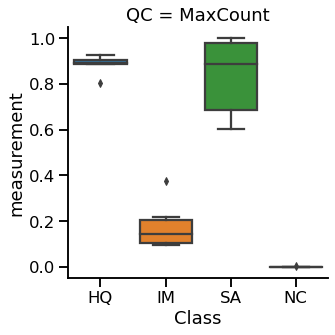

In [7]:
# 'Melt' the data
dataMelted = data.melt(id_vars='Class',
                       value_vars=['MaxCount'],
                       var_name='QC',
                       value_name='measurement')

# Plot the melted data
with sns.plotting_context('talk'):
    sns.catplot(x='Class',
                y='measurement',
                col='QC',
                data=dataMelted,
                kind="box",
                height=5,
                aspect=1);

# Save the plot
plt.savefig('myBoxplot_maxCount.png')

In [8]:
# create a mask for each class
maskGood = data.loc[:,'Class']=='HQ'
mask_non_conf = data.loc[:,'Class']=='IM'
maskSat = data.loc[:,'Class']=='SA'
maskBlur = data.loc[:,'Class']=='NC'
display(data.loc[maskGood])
display(data.loc[mask_non_conf])
display(data.loc[maskSat])
display(data.loc[maskBlur])

,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
0,1,HQ,A,1,1,0.8231,0.0,0.9257,0.8729,2,0.1253,15.9617
1,2,HQ,A,1,2,0.7649,0.0,0.8019,0.7965,2,0.1143,17.4918
2,3,HQ,A,1,3,0.8225,0.0,0.8885,0.8669,6,0.1244,48.2154
12,13,HQ,B,1,1,0.8300,0.0,0.9071,0.8517,11,0.1223,89.9658
13,14,HQ,B,1,2,0.7708,0.0,0.8885,0.8376,6,0.1202,49.8982
14,15,HQ,B,1,3,0.8206,0.0,0.8947,0.8657,6,0.1243,48.2834


,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
3,4,IM,A,2,1,0.3504,0.0,0.09598,0.1407,2,0.02020,98.9886
4,5,IM,A,2,2,0.3380,0.0,0.21980,0.2071,1,0.02973,33.6380
5,6,IM,A,2,3,0.3155,0.0,0.09907,0.1313,2,0.01886,106.0723
15,16,IM,B,2,1,0.3583,0.0,0.16410,0.2006,5,0.02879,173.6668
16,17,IM,B,2,2,0.3483,0.0,0.12380,0.1187,1,0.01704,58.6806
17,18,IM,B,2,3,0.5211,0.0,0.37460,0.4550,4,0.06532,61.2388


,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
6,7,SA,A,3,1,0.6897,1.3367,0.9938,0.8864,10,0.12720,78.5883
7,8,SA,A,3,2,0.6367,1.7822,0.8452,0.8057,1,0.11570,8.6458
8,9,SA,A,3,3,0.7326,1.1719,1.0000,0.9169,1,0.13160,7.5978
18,19,SA,B,3,1,0.7279,0.7324,0.9288,0.8676,2,0.12450,16.0594
19,20,SA,B,3,2,0.5673,0.2136,0.6316,0.6600,10,0.09474,105.5524
20,21,SA,B,3,3,0.4965,1.3123,0.6006,0.6514,12,0.09351,128.3244


,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
9,10,NC,A,4,1,6.1990,0.0,0.000000,0.11520,1,0.016540,60.4522
10,11,NC,A,4,2,4.2388,0.0,0.000000,0.01251,1,0.001796,556.7504
11,12,NC,A,4,3,6.5956,0.0,0.000000,0.36510,1,0.052400,19.0827
21,22,NC,B,4,1,4.3531,0.0,0.003096,0.02307,1,0.003312,301.9414
22,23,NC,B,4,2,8.0302,0.0,0.000000,0.12650,1,0.018160,55.0573
23,24,NC,B,4,3,5.1462,0.0,0.000000,0.10650,1,0.015290,65.4062


In [9]:
display(data.loc[maskGood].describe())
display(data.loc[mask_non_conf].describe())
display(data.loc[maskSat].describe())
display(data.loc[maskBlur].describe())

,n,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,6.00000,6.0,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000
mean,8.00000,1.0,2.000000,0.805317,0.0,0.884400,0.848550,5.500000,0.121800,44.969383
std,6.63325,0.0,0.894427,0.029255,0.0,0.042818,0.028505,3.331666,0.004107,27.081187
min,1.00000,1.0,1.000000,0.764900,0.0,0.801900,0.796500,2.000000,0.114300,15.961700
25%,2.25000,1.0,1.250000,0.783250,0.0,0.888500,0.841125,3.000000,0.120725,25.172700
50%,8.00000,1.0,2.000000,0.821550,0.0,0.891600,0.858700,6.000000,0.123300,48.249400
75%,13.75000,1.0,2.750000,0.822950,0.0,0.904000,0.866600,6.000000,0.124375,49.494500
max,15.00000,1.0,3.000000,0.830000,0.0,0.925700,0.872900,11.000000,0.125300,89.965800


,n,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,6.00000,6.0,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000
mean,11.00000,2.0,2.000000,0.371933,0.0,0.179558,0.208900,2.500000,0.029990,88.714183
std,6.63325,0.0,0.894427,0.074559,0.0,0.106275,0.126053,1.643168,0.018095,49.626835
min,4.00000,2.0,1.000000,0.315500,0.0,0.095980,0.118700,1.000000,0.017040,33.638000
25%,5.25000,2.0,1.250000,0.340575,0.0,0.105252,0.133650,1.250000,0.019195,59.320150
50%,11.00000,2.0,2.000000,0.349350,0.0,0.143950,0.170650,2.000000,0.024495,80.113700
75%,16.75000,2.0,2.750000,0.356325,0.0,0.205875,0.205475,3.500000,0.029495,104.301375
max,18.00000,2.0,3.000000,0.521100,0.0,0.374600,0.455000,5.000000,0.065320,173.666800


,n,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,6.00000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,14.00000,3.0,2.000000,0.641783,1.091517,0.833333,0.798000,6.000000,0.114542,57.461350
std,6.63325,0.0,0.894427,0.094489,0.546272,0.177563,0.116095,5.176872,0.016650,53.598735
min,7.00000,3.0,1.000000,0.496500,0.213600,0.600600,0.651400,1.000000,0.093510,7.597800
25%,8.25000,3.0,1.250000,0.584650,0.842275,0.685000,0.696425,1.250000,0.099980,10.499200
50%,14.00000,3.0,2.000000,0.663200,1.242100,0.887000,0.836650,6.000000,0.120100,47.323850
75%,19.75000,3.0,2.750000,0.718350,1.330600,0.977550,0.881700,10.000000,0.126525,98.811375
max,21.00000,3.0,3.000000,0.732600,1.782200,1.000000,0.916900,12.000000,0.131600,128.324400


,n,Column,Field,Mean/s.d.,%SatPix,MaxCount,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,6.00000,6.0,6.000000,6.000000,6.0,6.000000,6.000000,6.0,6.000000,6.000000
mean,17.00000,4.0,2.000000,5.760483,0.0,0.000516,0.124813,1.0,0.017916,176.448367
std,6.63325,0.0,0.894427,1.463894,0.0,0.001264,0.127383,0.0,0.018282,212.444513
min,10.00000,4.0,1.000000,4.238800,0.0,0.000000,0.012510,1.0,0.001796,19.082700
25%,11.25000,4.0,1.250000,4.551375,0.0,0.000000,0.043927,1.0,0.006306,56.406025
50%,17.00000,4.0,2.000000,5.672600,0.0,0.000000,0.110850,1.0,0.015915,62.929200
75%,22.75000,4.0,2.750000,6.496450,0.0,0.000000,0.123675,1.0,0.017755,242.807600
max,24.00000,4.0,3.000000,8.030200,0.0,0.003096,0.365100,1.0,0.052400,556.750400
